In [175]:
import math
import numpy as np
import seaborn as sns
import pandas as pd
from scipy.misc import derivative
from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_regression 

### Locally weighted linear regression

In [361]:
def yhat(x, theta):
    yhat_ = np.dot(x, theta)
    return yhat_

In [362]:
def cost_func(w, x, loss):
    cost_ = np.sum(np.dot(loss ** 2, w)) / 2  
    return cost_

In [363]:
#batch 
def gradient_desc(w, x, loss):
    gd = np.dot(loss, x)
    return gd

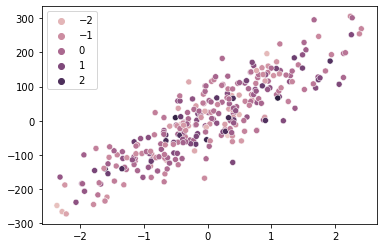

In [572]:
X, y = make_regression(n_samples=300, n_features=3, n_informative=1, random_state=0, noise=55) 
sns.scatterplot(x=X[:,1], y=y, hue = X[:,2])#, style=X[:,3])

alpha =0.001
theta_ = np.random.random (4)

# add intercept 
intercept = np.ones(300)
X = np.insert(X, 0, intercept, axis=1)

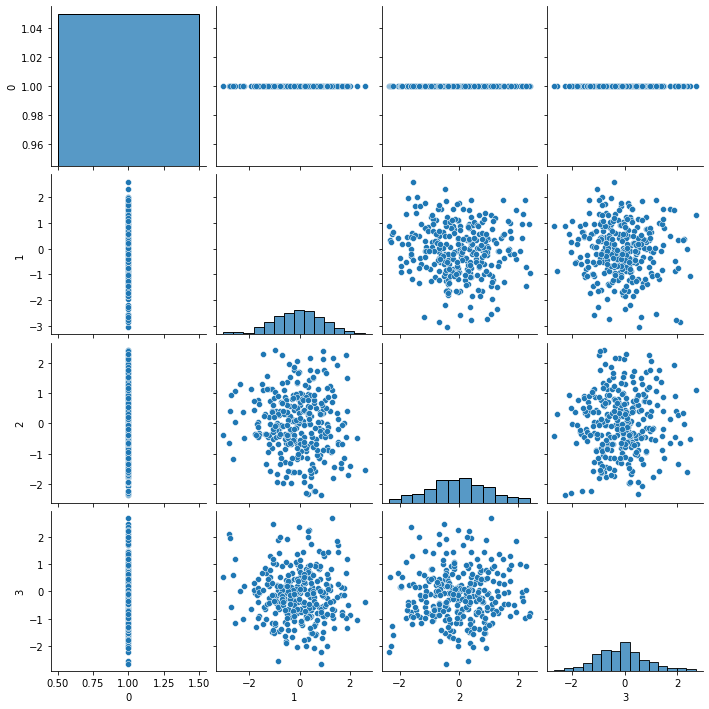

In [573]:
sns.pairplot(pd.DataFrame(X))

In [575]:
for i in range(1, X.shape[1]):
    print(i, np.corrcoef(y, X[:,i]))

1 [[ 1.         -0.08350294]
 [-0.08350294  1.        ]]
2 [[1.         0.87593312]
 [0.87593312 1.        ]]
3 [[1.        0.0268236]
 [0.0268236 1.       ]]


In [576]:
## W definition
def weight(X, x, t):
    w = np.vectorize(math.exp)(-((X-x)**2)/ (2*t**2))
    return w

In [577]:
## batch GD
def batch_lwr(X, x, t, t_):
    theta = t_.copy()
    diff, cost_, counter = float('inf'), float('inf'), 0
    W = weight(X, x, t)

    while diff > 0.00001 and counter < 100000:

        yhat_ = yhat(X, theta)
        loss = y - yhat_
        prev_cost = cost_
        cost_ = cost_func(W, X, loss)
        diff = abs(prev_cost - cost_)
        
        if counter %5 == 0: print("iter %s | J: %.3f | theta: %s | diff: %.3f" % (counter, cost_, theta, diff))    
        theta += alpha*gradient_desc(W, X, loss)
        counter +=1
    return theta
    

In [619]:
x =[0, 0, 1.5, 0]
t = 5

In [620]:
theta = batch_lwr(X, x, t, theta_)

iter 0 | J: 7505583.556 | theta: [0.9094512  0.43552348 0.25242448 0.0946001 ] | diff: inf
iter 5 | J: 1918982.711 | theta: [ 3.56468520e+00 -4.22729523e+00  8.27178070e+01 -4.00633788e-02] | diff: 162754.885
iter 10 | J: 1765436.471 | theta: [ 3.84777012 -2.70594106 96.33770878 -1.42010153] | diff: 4880.238
iter 15 | J: 1760654.089 | theta: [ 3.86268796 -2.11933966 98.67119168 -1.90227682] | diff: 159.398
iter 20 | J: 1760496.465 | theta: [ 3.85595569 -1.97246426 99.08383784 -2.03286401] | diff: 5.206
iter 25 | J: 1760491.407 | theta: [ 3.85200343 -1.94073775 99.15873013 -2.06529172] | diff: 0.171
iter 30 | J: 1760491.178 | theta: [ 3.8504981  -1.934415   99.17260692 -2.07308427] | diff: 0.020
iter 35 | J: 1760491.121 | theta: [ 3.85000325 -1.93322872 99.17522066 -2.07494044] | diff: 0.008
iter 40 | J: 1760491.098 | theta: [ 3.84985255 -1.93301948 99.17571955 -2.07538398] | diff: 0.003
iter 45 | J: 1760491.091 | theta: [ 3.84980876 -1.9329856  99.17581586 -2.07549093] | diff: 0.001
it

In [621]:
lm = LinearRegression()
lm.fit(X, y)
ans = [lm.intercept_] + list(lm.coef_[1:])
print(ans)

[3.8497917634185255, -1.932980667669895, 99.17583928584543, -2.0755255904127736]


In [622]:
import operator
diff = [abs(i) for i in list(map(operator.sub, ans, list(theta)))]
diff

[1.170151713303369e-07,
 3.325293840283905e-08,
 5.309526329710934e-08,
 1.8100500298601219e-07]

In [551]:
import scipy.stats as ss
ss.rankdata(diff)

array([3., 1., 2., 4.])